Welcome to the Jupyter notebook! This platform allows you to use the power of computer coding to perform complex calculations. "But I don't know anything about computer code!!" Don't worry! Jupyter notebooks use short instructions to perform complex operations. The coding language this platform uses is called Python and the commands that are written are like shortcuts for lots of complicated coding. You don't have to understand how the code works, but I hope you will be able to follow what is happening at each step. Each rectangle below contains a set of instructions for the computer to follow. By running each box, we ask the computer to follow the instructions we give it. Sometimes you won't see a result when you run a code box but other times we will see an Out box pop up. Follow along with your protocol and let's get started!

## In each box, descriptions of each command are given and are set apart from the coding language by the # symbol. You should click on each box and then the "run cell" button to execute the code written inside.

In [1]:
#The first thing we need to do is set up the notebook so it will be ready to do what we ask of it.
#We are going to want to make some graphs, also called plots, so we first create this environment.
#The code below this line sets up a plotting environment inside the notebook.
%matplotlib notebook
#Next we will bring in some shortcut libraries that we will use for our analyses.
#Think of these like toolboxes containing lots of shortcuts. We call these modules.
#When the code line says "import", we are simply bringing in Python modules with code and objects we can use.
import pandas as pd #pandas provides the capability for spreadsheets
import numpy as np #for numerical analysis
import matplotlib.pyplot as plt #for plotting
import scipy.stats as ss #for statistical analysis
import seaborn as sb #for nicer graphics
#now we have a set of tools that we can call on inside the notebook to do things for us.
sb.set_style('darkgrid') #sets background style for graphics

Now we are ready to begin our data analysis. 

In [5]:
#First we need to bring in our data.
#One of toolboxes we imported in the previous step was called "pandas". This toolbox has lots of functions that will
#help us convert the data from the Excel format into the format this program can read.
#We will first use a function from pandas. 
#In the import statement above, we said we would import pandas under the name pd. So 
#we can use pandas functions with pd.function_name
#Read in the Excel file: note that you have to know where the file is on your computer relative to where the notebook is
#We read in the data from the file and store it in a data frame object called leaves
leaves = pd.read_excel('Leaf_data_example_set1.xlsx')
#We want to make sure that worked, so we tell the program to show us the first few lines of the data.
leaves.head()


,Group,Shade/Sun,Leaf #,Length,Width
0,1,Sun,1,6.9,3.5
1,1,Sun,2,8.5,4.5
2,1,Sun,3,6.6,3.4
3,1,Sun,4,7.5,4.0
4,1,Sun,5,6.8,3.5


Awesome! Now we have imported our Excel data into the notebook and we can begin analyzing it. You used Excel in Part 2 of the protocol to calculate descriptive statistics. You can use code to do the same thing and you don't have to remember Excel formulas to do it.

In [6]:
#Before we get started, let's generate a new variable for the ratio.
#We can easily do that by asking the computer to calculate the ratio of length to width
leaves['l_w_ratio'] = leaves['Length']/leaves['Width']
leaves.head()

,Group,Shade/Sun,Leaf #,Length,Width,l_w_ratio
0,1,Sun,1,6.9,3.5,1.971429
1,1,Sun,2,8.5,4.5,1.888889
2,1,Sun,3,6.6,3.4,1.941176
3,1,Sun,4,7.5,4.0,1.875000
4,1,Sun,5,6.8,3.5,1.942857


In [7]:
#First we will divide the data into 2 sets; sun and shade
sun = leaves[leaves['Shade/Sun']=='Sun']
shade = leaves[leaves['Shade/Sun']=='Shade']


In [8]:
#Next we use the command below to generate the descritpive statistics for the Sun subset.
#But we are missing some...
sun.describe()

,Group,Leaf #,Length,Width,l_w_ratio
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,30.500000,6.573333,3.330000,1.981243
std,0.823387,17.464249,1.091705,0.593267,0.140388
min,1.000000,1.000000,4.000000,2.200000,1.648649
25%,1.000000,15.750000,5.900000,2.900000,1.883379
50%,2.000000,30.500000,6.550000,3.200000,1.967857
75%,3.000000,45.250000,7.275000,3.625000,2.072557
max,3.000000,60.000000,8.800000,4.900000,2.310345


In [9]:
#We can compute the extra stats for each data set and add them to the data frame.
#Compare these numbers to what you calculated in Excel
#Here's the command to find the range.
r=sun[['Length','Width']].apply(np.ptp)
#Here's the command to find the Variance
v = sun[['Length','Width']].apply(np.var)
#And the Standard error
stderr = sun[['Length','Width']].apply(ss.sem)
#And the 95% CI
ci_s = sun[['Length','Width']].apply(lambda x: ss.norm.interval(0.95,loc=x.mean(),scale=ss.sem(x)))
#Merge these into the sun data frame
sun_stats = sun[['Length','Width']].describe().append(pd.DataFrame([r,v,stderr,ci_s],\
                                                        index=['Range','Variance','SEM','95% CI']))
sun_stats

,Length,Width
count,60,60
mean,6.57333,3.33
std,1.0917,0.593267
min,4,2.2
25%,5.9,2.9
50%,6.55,3.2
75%,7.275,3.625
max,8.8,4.9
Range,4.8,2.7
Variance,1.17196,0.3461


In [10]:
#Here's the Shade data set full stats
r=shade[['Length','Width']].apply(np.ptp)
v = shade[['Length','Width']].apply(np.var)
stderr = shade[['Length','Width']].apply(ss.sem)
ci_s = shade[['Length','Width']].apply(lambda x: ss.norm.interval(0.95,loc=x.mean(),scale=ss.sem(x)))
shade_stats = shade[['Length','Width']].describe().append(pd.DataFrame([r,v,stderr,ci_s],index=['Range','Variance','SEM','95% CI'],\
                                                    columns=['Length','Width']))
shade_stats

,Length,Width
count,60,60
mean,7.09667,3.735
std,1.56129,0.881029
min,3.8,1.8
25%,6.1,3.075
50%,6.85,3.6
75%,8.225,4.4
max,10.8,5.6
Range,7,3.8
Variance,2.39699,0.763275


Compare these numbers to what you calculated using Excel!

We are ready to start our statistical analysis. The first thing we need to do is simply plot the distribution of our data one variable at a time and look for the characteristic "bell curve" shape. This would mean that the data is normally distributed. Remember that we need to know this so we can decide what test to do. 

<IPython.core.display.Javascript object>


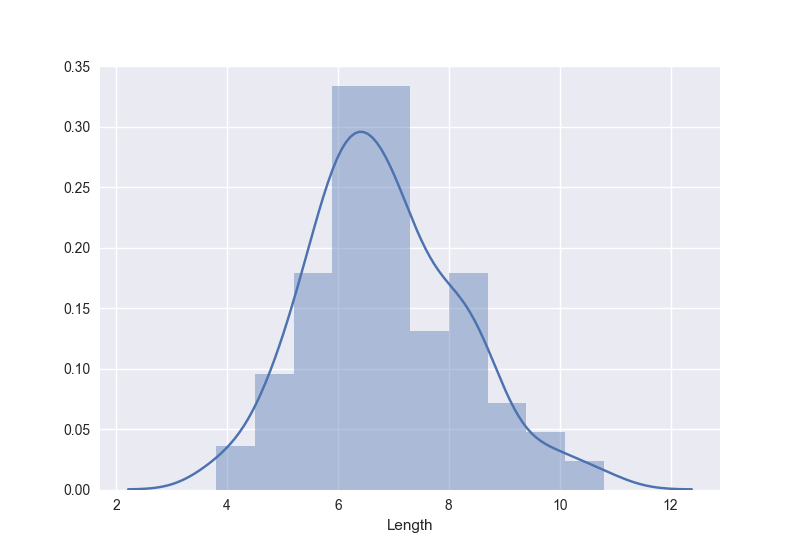

In [11]:
#Above, we brought in the toolbox seaborn and called it sb.
#Now we can call on that toolbox anytime we type sb and use one of the tools it contains. 
#First, we will plot the distribution of the Length variable, keep in mind sun and shade are combined for this!
#the command below tells the computer to use the distribution plot in the seaborn toolbox to plot the leaves variable.
sb.distplot(leaves['Length'])

Great! You should see a plot appear above this box. Click on the power button symbol in the upper right of the graph so that new data won't be plotted on top. Does the data look normal? Yes! Now let's check the width variable.

In [ ]:
#Notice that the code here is the same above but we have changed the variable to width.
sb.distplot(leaves['Width'])

Yep, this variable looks normal too. Remember to click the power button in the upper right before moving on.

Now we are ready to begin our statistical analysis. You should have decided that we will want to do a test for a correlation between these two variables. We will also plot the data using a scatter plot. This will allow us to generate an equation for the relationship. You may remember from algebra that when you make a scatter plot, you can add a trendline. This trendline summarizes the relationship and can be expressed with an equation y=mx+b where b is the y-intercept of the line and m is the slope.

 
0.5341 x - 0.1182


<IPython.core.display.Javascript object>


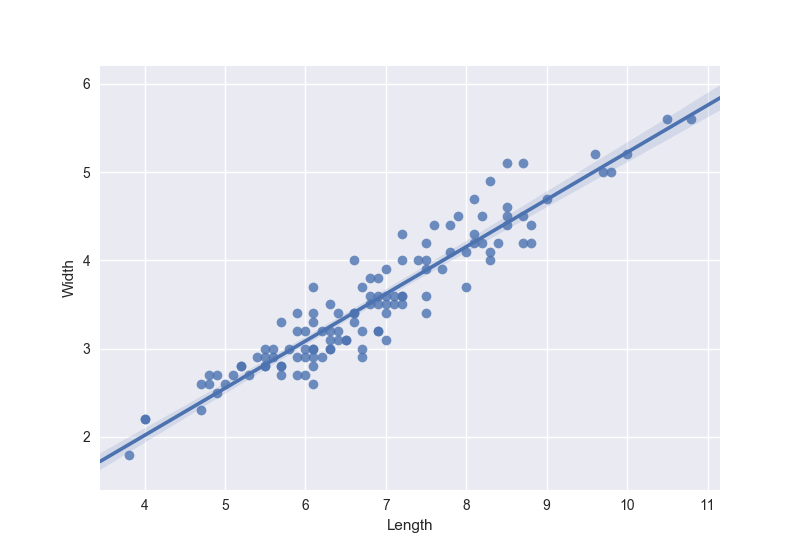

In [12]:
#We will ask the computer to make a scatter plot with linear regression line and equation
#we will call on the toolbox numpy calculate an equation for this relationship.
equation=np.poly1d(np.polyfit(leaves['Length'],leaves['Width'],1))
print(equation)
#regplot will draw scatter plus fit line, also puts 95% confidence band
sb.regplot(leaves['Length'],leaves['Width'])


Looks good! Don't forget to click the power button in the upper right of this graph. You should either take a screenshot of this graph or download it by clicking on the disc icon. This graph should end up in your digital datasheet. Also record the equation for this line (shown above the plot). 

Now we need to do a statistical test to find out if this relationship is good enough to validate our prediction. Remember that earlier we determined that both of our variables were normal. So using the decision tree, hopefully you can see that we can use a Pearson correlation test for our data.

In [13]:
#We will call on the toolbox scipy and use it's tool for the Pearson correlation coefficient.
ss.pearsonr(leaves['Length'],leaves['Width'])

(0.94201831478231646, 8.5441077609470691e-58)

In [14]:
#Here's another way to do the regression and get all of the relevant values
slope,intercept,rval,pvalue,stderr = ss.linregress(x=leaves['Length'],y=leaves['Width'])
print('Slope',slope)
print('Intercept',intercept)
print('Rsq',rval**2)
print('pvalue',pvalue)

Slope 0.534121419545
Intercept -0.118219902587
Rsq 0.887398505385
pvalue 8.54410776095e-58


Now we have an Rsq value and a p-value! You will want to record those values on your datasheet and answer the relevant question about what that means for your hypothesis.

# Let's start the analysis for Question 2.

In [15]:
#For Question 2, we are going to want to compare sun vs. shade. 
#The first step here will be to tell the computer to separate out the variables into the two groups.
grouped = leaves.groupby('Shade/Sun')

<IPython.core.display.Javascript object>


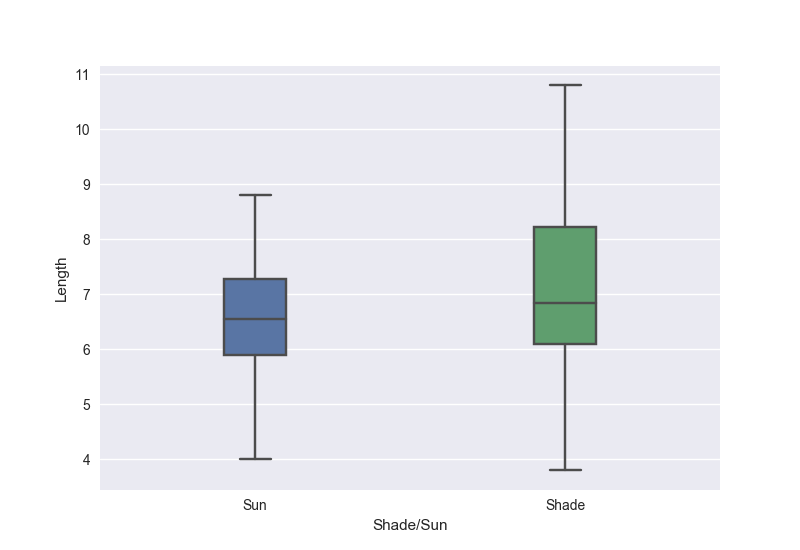

In [16]:
#You already made a similar graph in Excel, but this is just as easy using the notebook.
#The code below makes a boxplot where length is on the Y-axis and the sun or shade categorical variable is on the x.
#width simply refers to the width of the bars.
#click the power button off after you run this box.
sb.boxplot(data=leaves, x='Shade/Sun',y='Length',width=0.2)

In [ ]:
#Here's the same plot but with the width variable instead of length.
#Click that power button after you run this box.
sb.boxplot(data=leaves, x='Shade/Sun',y='Width',width=0.2)

Now look at the graph above. Do you see that small diamond above the "sun" bar? That is an outlier. We will be leaving that data point in the analysis but it's presence would at least trigger us to go back to the data and double check our numbers looking for typos or mis-measurements.

In [ ]:
#Here's the box plot of the ratio variable shown by growing condition.
#Click the power button off after you run this box.
sb.boxplot(data=leaves, x='Shade/Sun',y='l_w_ratio',width=0.2)

In [ ]:
#Let's put all these graphs, or subplots, together into one grouping to make comparing them easier.
#This first line simply sets the size of the figures.
plt.figure(figsize=[8,12])
#Now we will set up the subplots
#We give the command for a subplot and tell the computer that there will be 3 in total. This is the first digit, 3.
#Then we tell it we want the first 2 on a line together. This is the second digit, 2. 
#The last digit in the parenthesis is the order in which each subplot will be displayed.
plt.subplot(321)
bp1 = sb.barplot(x='Shade/Sun',y='Length',data=leaves, capsize=0.2)
#Set y axis limits so they match
bp1.set(ylim=(0,10))
plt.subplot(322)
bp2 = sb.barplot(x='Shade/Sun',y='Width',data=leaves, capsize=0.2)
#Set y axis limits so they match
bp2.set(ylim=(0,10))
plt.subplot(323)
#Note the different y axis for the ratio
bp3 = sb.barplot(x='Shade/Sun',y='l_w_ratio',data=leaves,capsize=0.2)

Copy or download this graph set to your electronic datasheet under the "Combined graph for Question 2" heading.

## Now we are ready to start the analysis for Question 2.

Just as we did for Question 1, first we should look at how the data is distributed and check for normality. Remember that when we did this earlier, all the data was lumped together. Now we will separate it out into sun and shade. Run these next 4 cells to generate the histograms for length and width for sun and shade. If you look at the code, you can see that only the title of the graph and the variable name changes between cells. You must click the power button in the upper right of each graph before moving on.

In [ ]:
#Evaluate normality
plt.title('Histogram of Length for Sun')
sb.distplot(sun['Length'])

In [ ]:
plt.title('Histogram of Length for Shade')
sb.distplot(shade['Length'])

In [ ]:
plt.title('Histogram of Width for Sun')
sb.distplot(sun['Width'])

In [ ]:
plt.title('Histogram of Width for Shade')
sb.distplot(shade['Width'])

The data looks good! All variables are a farily good approximation of normal. Hopefully you decided that you should do either a t-test or a Mann-Whitney U-test for Question 2. Since our data is normal, we can do a t-test. Notice that on the decision tree you have the option for a paired or unpaired test. A paired t-test would be used if we were sampling our two groups from the same individual tree. In this case, different trees were sampled, so we would use a unpaired t-test. We will want to do a two-sided test because we don't want to assume one group would be bigger than the other.

You should have written a hypothesis for Question 2 that involves only one varialble. Run each of the following cells but note the results that pertain to your variable. 

In [17]:
#Here's the t-test for Length
result=ss.ttest_ind(sun['Length'],shade['Length'])
#We want a two sided test, so we will divide P-value by 2
print("Test statistic:",result[0],"P-value:",result[1]/2)


Test statistic: -2.12781815324 P-value: 0.0177165472851


In [18]:
#2-sided test for width
result=ss.ttest_ind(sun['Width'],shade['Width'])
print("Test statistic:",result[0],"P-value:",result[1]/2)

Test statistic: -2.95353309554 P-value: 0.00189623667903


In [19]:
#2-sided test for ratio
result=ss.ttest_ind(sun['l_w_ratio'],shade['l_w_ratio'])
print("Test statistic:",result[0],"P-value:",result[1]/2)

Test statistic: 2.69134993631 P-value: 0.00407509375956


# Great work! You've just finished your first Jupyter notebook